In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess a sample image

In [3]:
image_url = "https://images.unsplash.com/photo-1518717758536-85ae29035b6d?auto=format&fit=crop&w=224&q=80"
image_path = tf.keras.utils.get_file("dog.jpg", image_url)

img_raw = tf.io.read_file(image_path)                          # Read image file as bytes
img = tf.image.decode_jpeg(img_raw, channels=3)                # Decode JPEG image
img = tf.image.resize(img, [224, 224])                         # Resize to 224x224
img = tf.cast(img, tf.float32) / 255.0                         # Normalize to [0, 1]

11456/11456 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


# Define a list of augmentations using tf.image

In [4]:
augmented_images = [
    img,                                                       # Original image
    tf.image.flip_left_right(img),                             # Horizontal flip
    tf.image.flip_up_down(img),                                # Vertical flip
    tf.image.rot90(img),                                       # Rotate 90 degrees
    tf.image.adjust_brightness(img, 0.3),                      # Brightness adjustment
    tf.image.adjust_contrast(img, 2.0),                        # Contrast enhancement
    tf.image.random_crop(tf.image.resize(img, [256, 256]), size=[224, 224, 3])  # Random crop
]

# Plot all augmented images

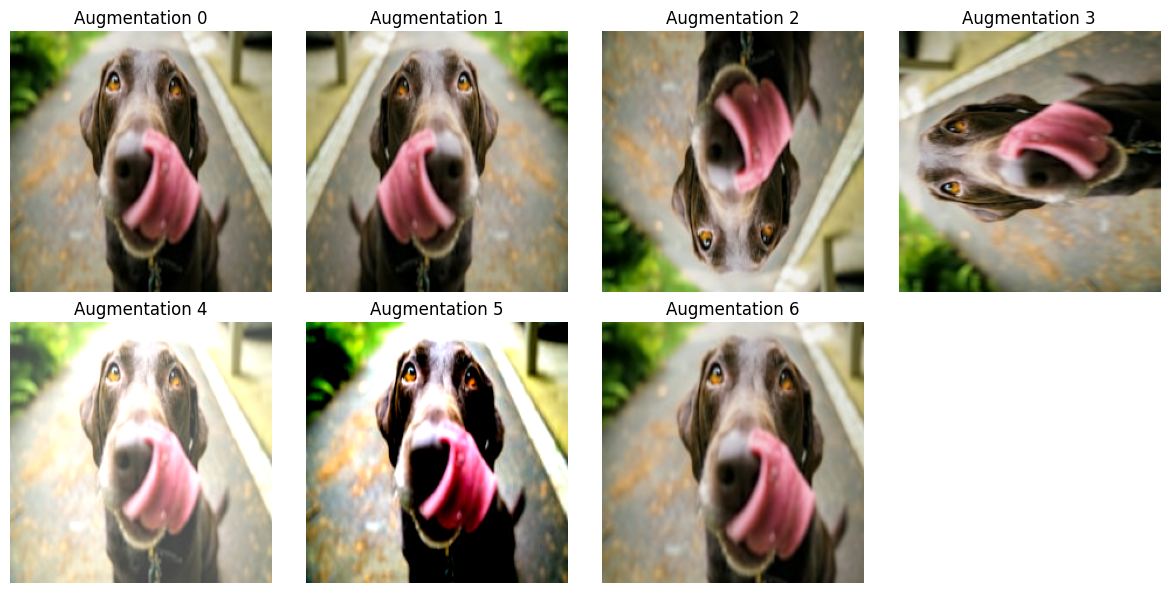

In [5]:
plt.figure(figsize=(12, 6))
for i, augmented in enumerate(augmented_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(tf.clip_by_value(augmented, 0.0, 1.0))          # Clip values to [0, 1] for display
    plt.axis('off')
    plt.title(f"Augmentation {i}")
plt.tight_layout()
plt.show()